In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
pop_df = pd.read_csv(r"C:\Users\MDESAI12\bank_data.csv")
pop_df
pop_df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


Q1) General Characteristics

In [3]:
pop_df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


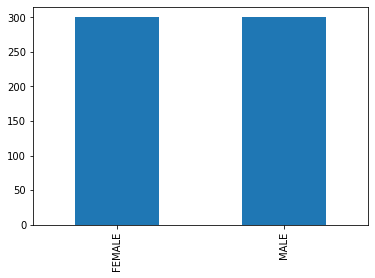

In [8]:
pop_df['gender'].value_counts().plot(kind='bar')

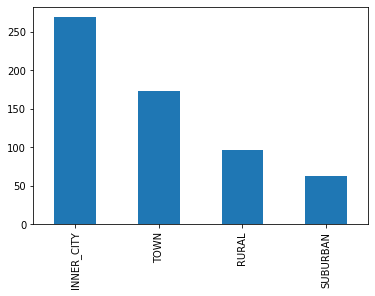

In [7]:
pop_df['region'].value_counts().plot(kind='bar')

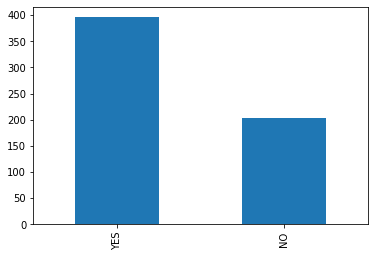

In [9]:
pop_df['married'].value_counts().plot(kind='bar')


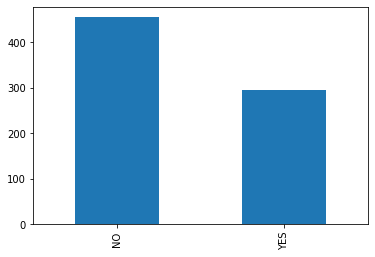

In [13]:
pop_df['car'].value_counts().plot(kind='bar')

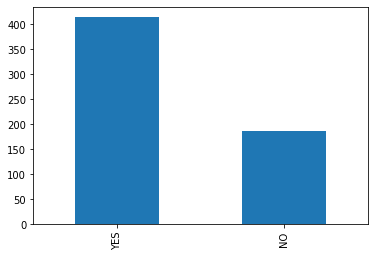

In [14]:
pop_df['savings_acct'].value_counts().plot(kind='bar')

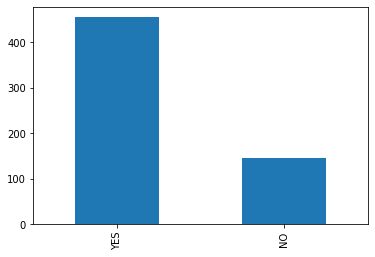

In [15]:
pop_df['current_acct'].value_counts().plot(kind='bar')

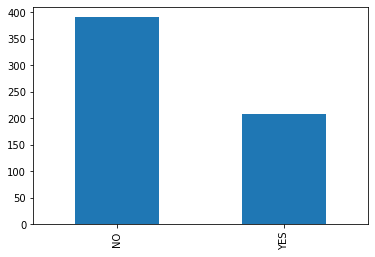

In [16]:
pop_df['mortgage'].value_counts().plot(kind='bar')

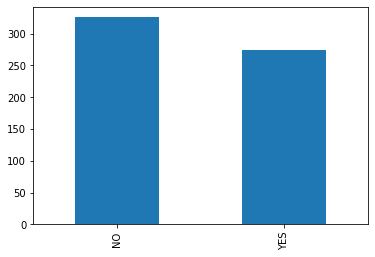

In [17]:
pop_df['pep'].value_counts().plot(kind='bar')

Q2) Compare pep

In [20]:
pop_com = pop_df.groupby(['pep']).describe().T
print(pop_com)

pep                       NO           YES
age      count    326.000000    274.000000
         mean      40.098160     45.127737
         std       14.123506     14.327991
         min       18.000000     18.000000
         25%       27.000000     34.000000
         50%       40.000000     45.000000
         75%       51.000000     58.000000
         max       67.000000     67.000000
income   count    326.000000    274.000000
         mean   24900.953374  30644.919453
         std    11661.123422  13609.613043
         min     5014.210000   7756.360000
         25%    15366.475000  19639.475000
         50%    23105.000000  28080.050000
         75%    31210.900000  38458.350000
         max    61554.600000  63130.100000
children count    326.000000    274.000000
         mean       1.067485      0.945255
         std        1.195524      0.860571
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        0.000000      1.000000
         75

If pep is yes then income is high , so we can tell that person who have tak eequity plans they are earning more than the average. you can also see that person with number of children is less likely to by equity plans.

Q3) Z-score Normalization

In [21]:
zscore_inc = (pop_df["income"] - pop_df["income"].mean()) / pop_df["income"].std() 
zscore_inc.head(5)

0   -0.773523
1    0.198541
2   -0.848766
3   -0.554180
4    1.787071
Name: income, dtype: float64

Q4) Discretize age

In [22]:
discrete = pd.qcut(pop_df.age, [0, .33, .66, 1], labels = ["young", "mid-age", "old"])
discrete.head(10)

0    mid-age
1    mid-age
2        old
3      young
4        old
5        old
6      young
7        old
8    mid-age
9        old
Name: age, dtype: category
Categories (3, object): [young < mid-age < old]

Min-Max normalization

In [24]:
min_max_age = (pop_df['age'] - pop_df['age'].min()) / (pop_df['age'].max() - pop_df['age'].min())

In [25]:
min_max_inc = (pop_df['income'] - pop_df['income'].min()) / (pop_df['income'].max() - pop_df['income'].min())

In [26]:
min_max_children = (pop_df['children'] - pop_df['children'].min()) / (pop_df['children'].max() - pop_df['children'].min())

In [27]:
pop_df['age'] = min_max_age
pop_df['income'] = min_max_inc
pop_df['children'] = min_max_children

In [28]:
pop_df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


Q6) Standard Spreadsheet

In [31]:
pop2_df = pop_df.drop('id', axis=1)

In [36]:
pop_numeric = pd.get_dummies(pop2_df)
pop_numeric.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
1,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
2,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
3,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
4,0.795918,0.783987,0.000000,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
5,0.795918,0.565343,0.666667,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1
6,0.081633,0.066468,0.000000,0,1,0,1,0,0,1,...,1,0,1,0,0,1,1,0,0,1
7,0.816327,0.342977,0.000000,0,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
8,0.387755,0.349132,0.666667,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
9,0.734694,0.330338,0.666667,0,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0


In [37]:
bank_numeric = pop_numeric
bank_numeric.to_csv("bank_numeric.csv", float_format="%1.2f")

Q7) Correlation analysis

In [38]:
pop_numeric.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


Q8) Scatter plot

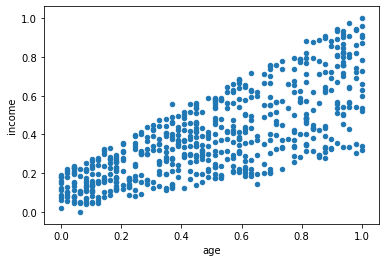

In [39]:
pop_df.plot(x = 'age', y = 'income', kind = 'scatter')

Yes, they are positively correlated.

Q9) Histogram

(array([ 54., 138., 139., 101.,  68.,  44.,  36.,  20.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 8 Patch objects>)

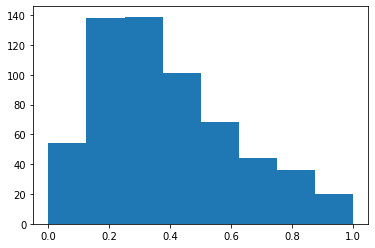

In [40]:
plt.hist(pop_df['income'], bins=8)

(array([45., 42., 39., 40., 29., 42., 44., 53., 40., 35., 30., 34., 37.,
        35., 55.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 15 Patch objects>)

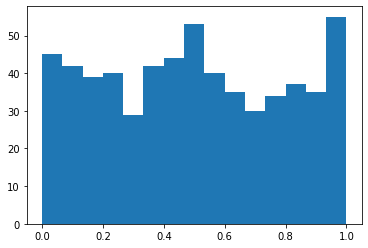

In [42]:
plt.hist(pop_df['age'], bins=15)

Q10) Region bar plot

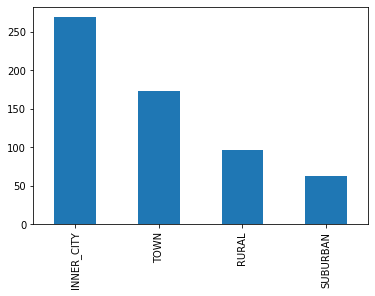

In [44]:
pop2_df['region'].value_counts().plot(kind='bar')

Q11) cross tab

In [47]:
pop_cross = pd.crosstab(pop2_df['region'], pop2_df['pep'])
pop_cross

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71
